In [1]:
import pandas as pd
from sqlalchemy import create_engine

db_engine = create_engine("sqlite:///../data/equity_pipeline.db")

final_df = pd.read_sql(
    "SELECT * FROM final_dataset",
    db_engine
)

final_df.head()


,month,aapl_return,msft_return,spy_return,cpi,unemployment,interest_rate,vix
0,2015-01-01,NaN,NaN,NaN,234.747,5.7,0.11,19.119500
1,2015-02-01,0.137485,-0.050265,0.028226,235.342,5.5,0.11,15.904211
2,2015-03-01,0.004887,-0.018382,0.000884,235.976,5.4,0.11,14.812727
3,2015-04-01,0.010483,0.031683,0.008468,236.222,5.4,0.12,13.494762
4,2015-05-01,0.014940,0.096307,0.009774,237.001,5.6,0.12,13.338500


In [3]:
correlation_matrix = final_df.drop(columns=["month"]).corr()

print(correlation_matrix)


               aapl_return  msft_return  spy_return       cpi  unemployment  \
aapl_return       1.000000     0.522952    0.665666 -0.037109      0.216056   
msft_return       0.522952     1.000000    0.713147 -0.091307      0.187978   
spy_return        0.665666     0.713147    1.000000  0.037929      0.231350   
cpi              -0.037109    -0.091307    0.037929  1.000000     -0.268461   
unemployment      0.216056     0.187978    0.231350 -0.268461      1.000000   
interest_rate    -0.031399     0.002652    0.075350  0.814613     -0.441968   
vix              -0.304704    -0.327902   -0.483264  0.123845      0.411651   

               interest_rate       vix  
aapl_return        -0.031399 -0.304704  
msft_return         0.002652 -0.327902  
spy_return          0.075350 -0.483264  
cpi                 0.814613  0.123845  
unemployment       -0.441968  0.411651  
interest_rate       1.000000 -0.171813  
vix                -0.171813  1.000000  


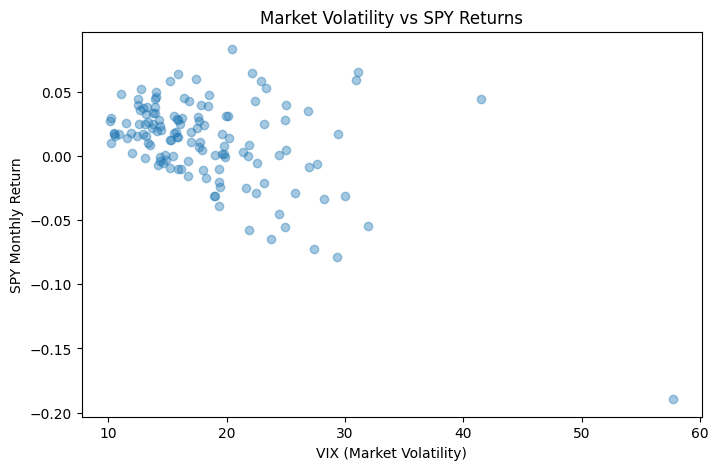

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(final_df["vix"], final_df["spy_return"], alpha=0.4)
plt.xlabel("VIX (Market Volatility)")
plt.ylabel("SPY Monthly Return")
plt.title("Market Volatility vs SPY Returns")
plt.show()


In [5]:
final_df.groupby(final_df["vix"] > final_df["vix"].median())["spy_return"].mean()


vix
False    0.021127
True     0.001313
Name: spy_return, dtype: float64

In [6]:
analysis_df = final_df.dropna().copy()
analysis_df.describe()


,aapl_return,msft_return,spy_return,cpi,unemployment,interest_rate,vix
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.020453,0.020591,0.011264,271.875623,4.639231,2.002000,18.319126
std,0.066128,0.049358,0.034679,29.489933,1.666659,1.918008,6.548974
min,-0.156431,-0.145022,-0.189548,235.342000,3.400000,0.050000,10.125455
25%,-0.018142,-0.010110,-0.003794,246.790500,3.725000,0.155000,13.950833
50%,0.015538,0.019509,0.016766,259.188500,4.200000,1.465000,16.776591
75%,0.065115,0.048408,0.031356,301.601250,4.900000,4.190000,21.571897
max,0.229234,0.185984,0.083058,326.030000,14.800000,5.330000,57.736818
